In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../utils')
print(sys.path)
import numpy as np
from load_dataset import *
import os

['/home/shiqi/code/Project2-sensor-case/model_combination_Argos/pca_from_formulation', '/home/shiqi/anaconda3/envs/torch/lib/python39.zip', '/home/shiqi/anaconda3/envs/torch/lib/python3.9', '/home/shiqi/anaconda3/envs/torch/lib/python3.9/lib-dynload', '', '/home/shiqi/anaconda3/envs/torch/lib/python3.9/site-packages', '../utils']


In [3]:
import yaml

config_path = '/home/shiqi/code/Project2-sensor-case/model_combination_Argos/pca_from_formulation/output_nonlinear/experiment_2/config_test_linear_model.yaml'
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

In [4]:
import torch

# Save dir
save_dir = config['save_dir']
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# todo: multi nu
nu_list = config['nu_list']

# Data loader
x_dataset, u_dataset, nu_dataset = [], [], []
for i in range(len(nu_list)):
    nu = nu_list[i]
    config['data_dir'] = config['data_dir_list'][i]
    x_data, u_data, nu_data, n_features, n_inputs = data_preparation_xu(config, nu_list, nu)
    x_dataset.append(x_data)
    u_dataset.append(u_data)
    nu_dataset.append(nu_data)
    print(np.max(x_data))
    print(np.min(x_data))
    print(nu_data.shape)
    print(nu_data[1, :])

Device: cuda
File not found: /home/shiqi/code/Project2-sensor-case/model_combination_Argos/data_dir/data_March/process_solution_data.py
3.070428087387174
-3.0721314853012585
(7152, 1)
[1.]


In [5]:
from sklearn.preprocessing import StandardScaler
scaler_x_set = []
x_dataset_scaled = []
for x_data in x_dataset:
    scaler_x = StandardScaler()
    x_data = scaler_x.fit_transform(x_data)
    x_dataset_scaled.append(x_data)
    scaler_x_set.append(scaler_x)

In [6]:
x_data_scaled = np.concatenate(x_dataset_scaled, axis=0)
x_data_scaled.shape

(7152, 6957)

In [7]:
print(np.mean(x_data_scaled, axis=0))
print(np.std(x_data_scaled, axis=0))

[ 2.08787747e-17 -4.61506299e-17 -5.87089413e-17 ... -4.08882473e-17
 -1.11394861e-16 -2.69794130e-17]
[1. 1. 1. ... 1. 1. 1.]


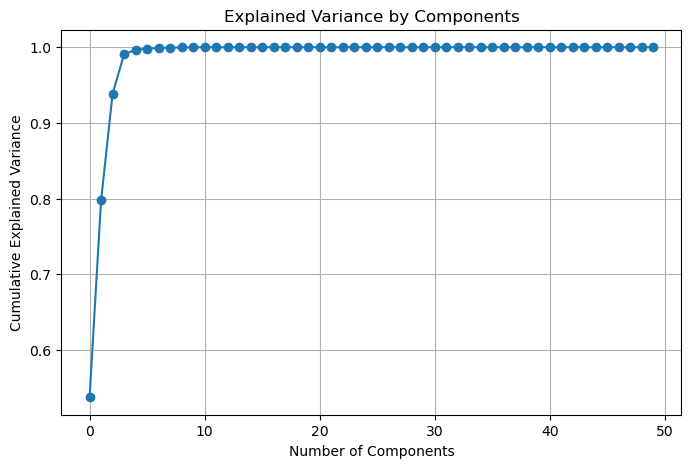

In [8]:
# 初始化PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=50)  # 选择一个初始的维度数目，例如100
x_pca = pca.fit_transform(x_data_scaled)

# 解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 可视化累积解释方差
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# plt.yscale('log')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


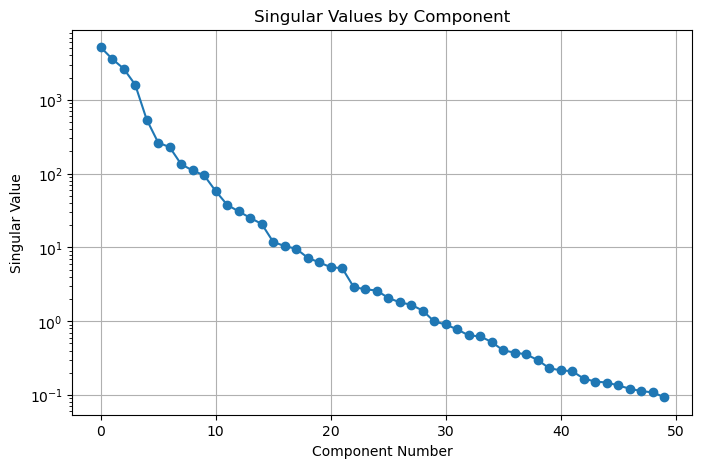

In [9]:
singular_values = pca.singular_values_

# Plot the singular values
plt.figure(figsize=(8, 5))
plt.plot(singular_values, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Singular Value')
plt.title('Singular Values by Component')
plt.yscale('log')
plt.grid(True)
plt.show()

In [11]:
singular_values

array([5.17154093e+03, 3.59821722e+03, 2.64770947e+03, 1.61003965e+03,
       5.41789712e+02, 2.63722588e+02, 2.28688103e+02, 1.34043737e+02,
       1.10438934e+02, 9.47327292e+01, 5.80638748e+01, 3.77909491e+01,
       3.08062857e+01, 2.51531923e+01, 2.08334774e+01, 1.19012460e+01,
       1.04268303e+01, 9.59622145e+00, 7.25053377e+00, 6.27288104e+00,
       5.39742083e+00, 5.23811156e+00, 2.90226277e+00, 2.71148201e+00,
       2.60334606e+00, 2.07523496e+00, 1.80314428e+00, 1.67224723e+00,
       1.39130783e+00, 9.92301332e-01, 9.03464742e-01, 7.73537310e-01,
       6.42833603e-01, 6.23338643e-01, 5.22059460e-01, 4.01684668e-01,
       3.75865962e-01, 3.55097377e-01, 2.97774677e-01, 2.30537430e-01,
       2.16142813e-01, 2.10288300e-01, 1.66644411e-01, 1.52259851e-01,
       1.47587964e-01, 1.34700204e-01, 1.21667734e-01, 1.12821115e-01,
       1.08620223e-01, 9.33251376e-02])

In [12]:
cumulative_explained_variance

array([0.5375148 , 0.79772555, 0.93861911, 0.99071742, 0.99661688,
       0.99801468, 0.99906577, 0.99942688, 0.99967201, 0.99985237,
       0.99992013, 0.99994883, 0.99996791, 0.99998062, 0.99998935,
       0.99999219, 0.99999438, 0.99999623, 0.99999729, 0.99999808,
       0.99999866, 0.99999921, 0.99999938, 0.99999953, 0.99999967,
       0.99999975, 0.99999982, 0.99999987, 0.99999991, 0.99999993,
       0.99999995, 0.99999996, 0.99999997, 0.99999998, 0.99999998,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

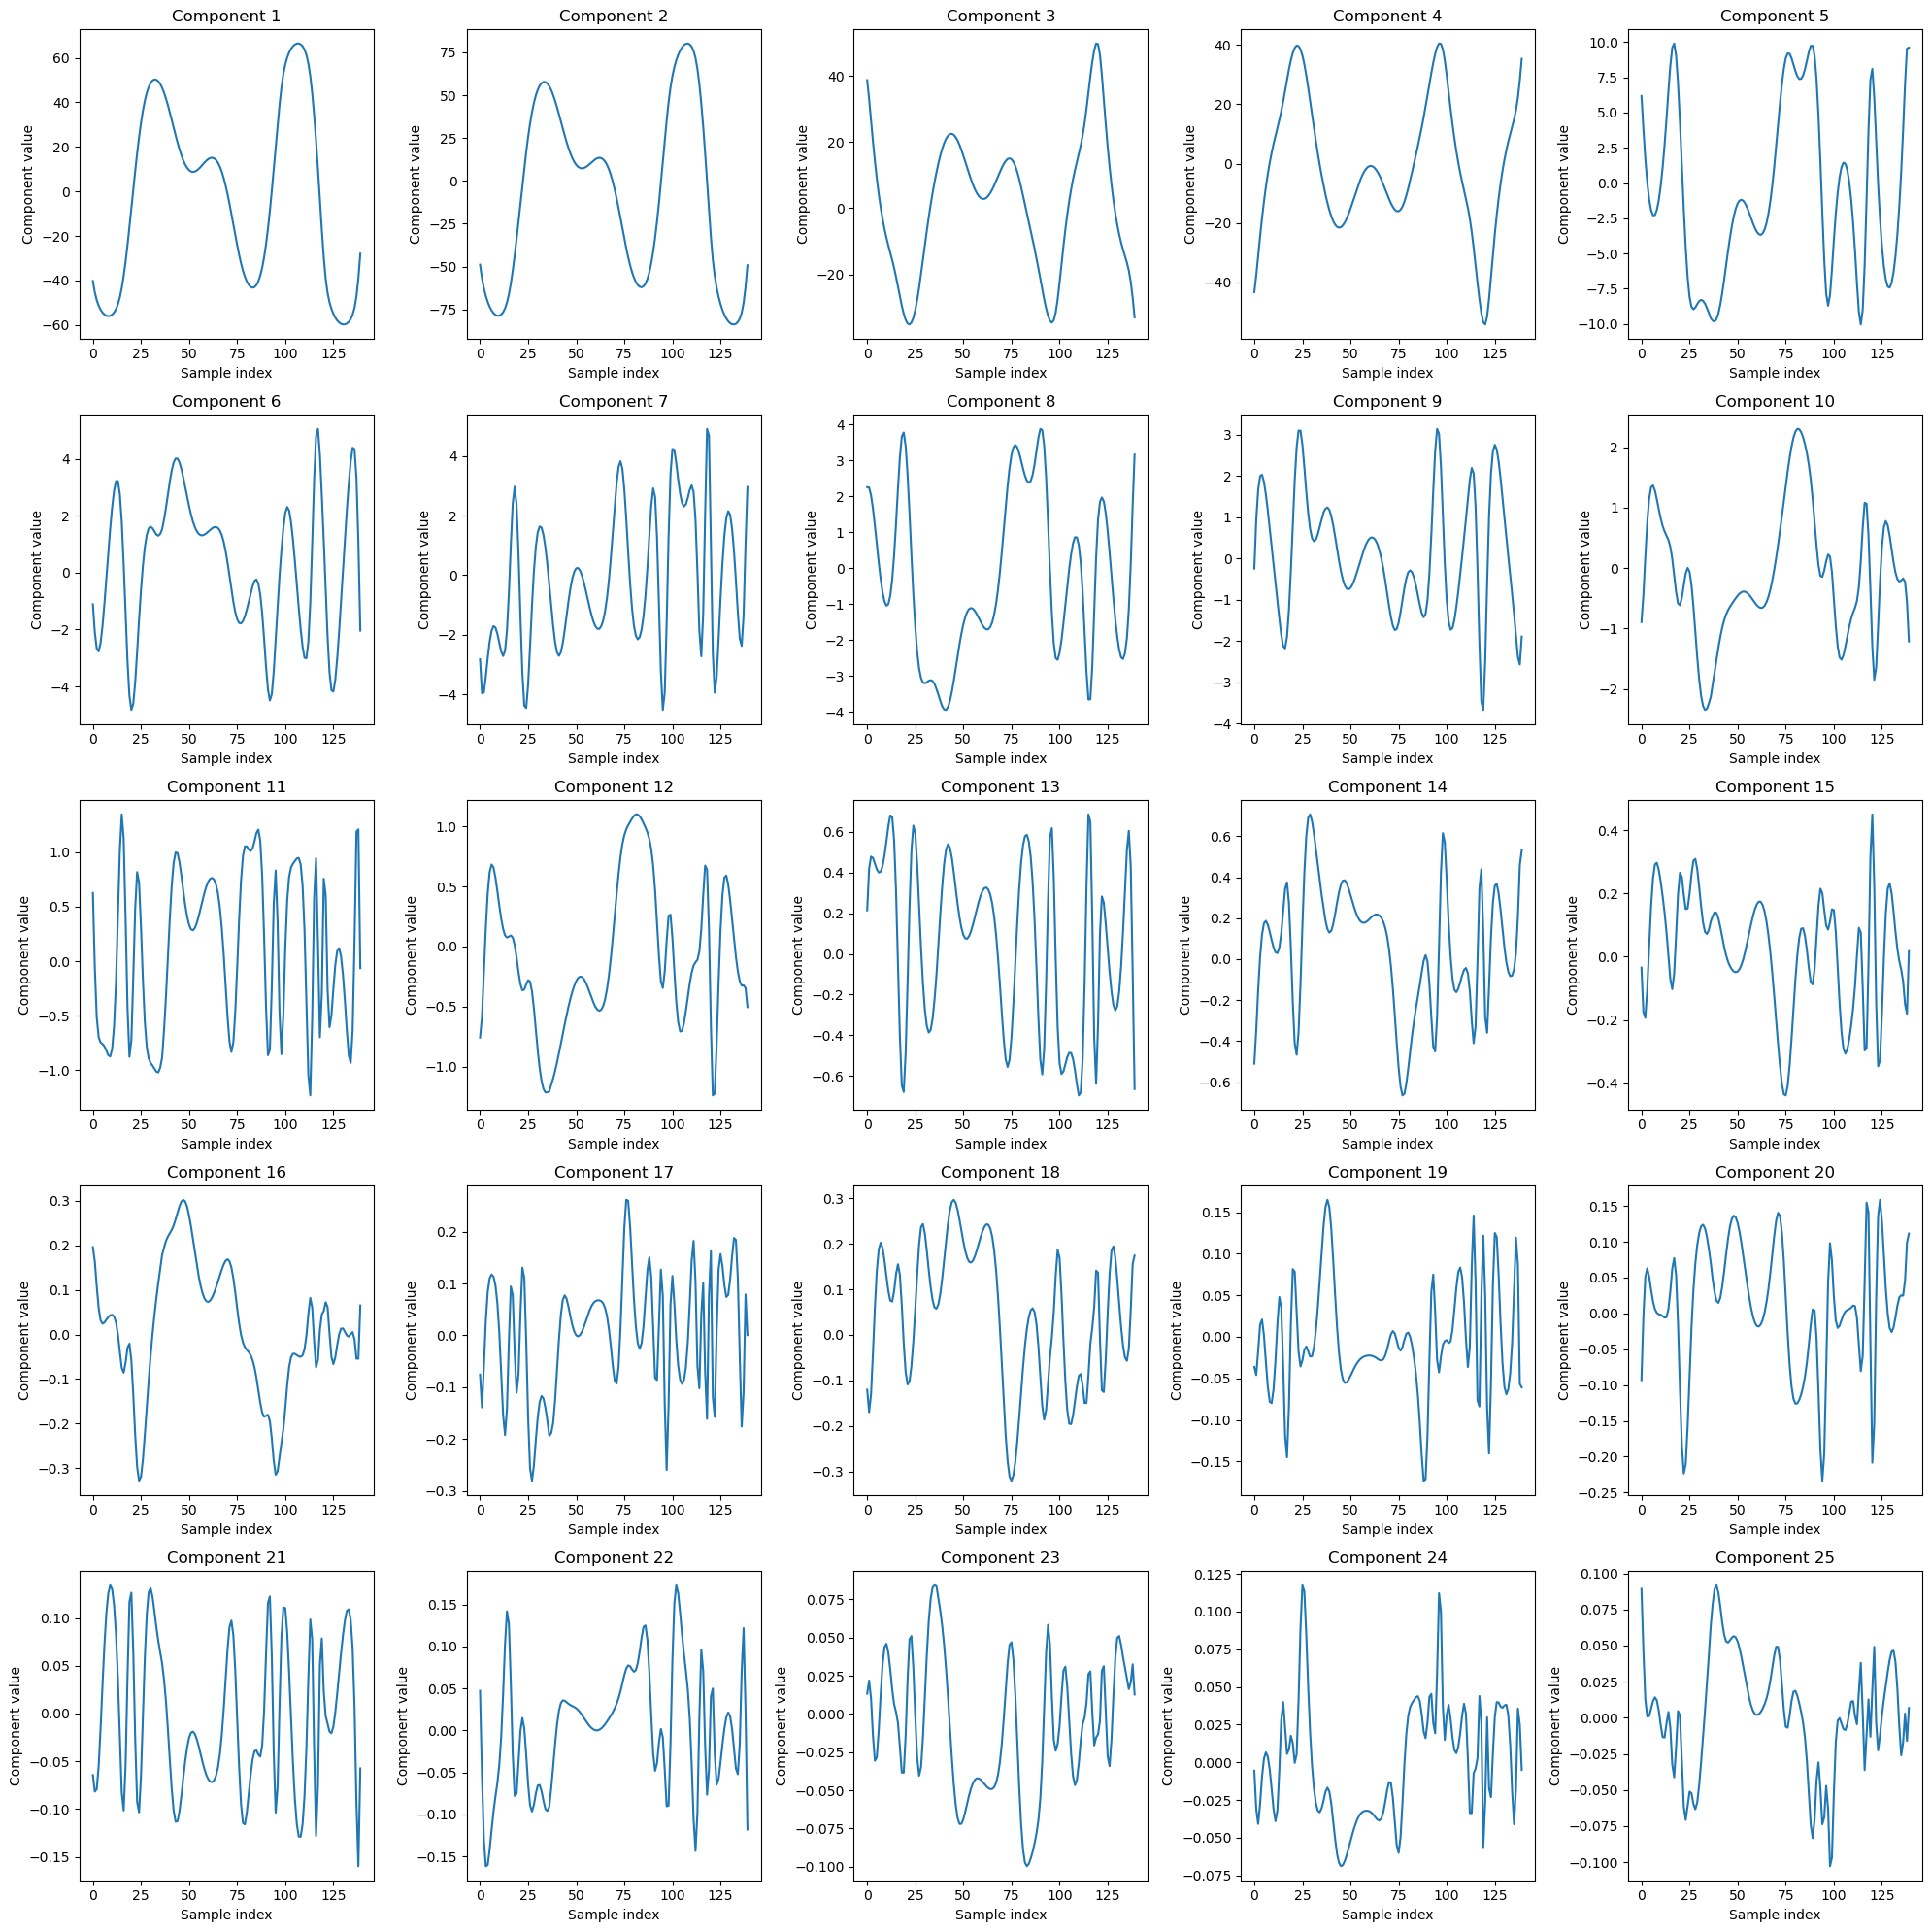

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Plotting the first 150 samples of each PCA component in a row of 5 subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
for i in range(25):
    row = i // 5  # Determining the row of the subplot
    col = i % 5   # Determining the column of the subplot
    axes[row, col].plot(x_pca[:140, i])  # Corrected to plot with dots for clarity
    axes[row, col].set_title(f'Component {i+1}')
    axes[row, col].set_xlabel('Sample index')
    axes[row, col].set_ylabel('Component value')

plt.tight_layout()
plt.show()
